In [213]:

from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torch.utils.data.sampler import SubsetRandomSampler

import numpy as np
import os
import csv
from matplotlib import pyplot as plt
import numpy as np

# 7

In [214]:
train_dataset_aug = datasets.MNIST('./data', train=True, download=True,
                    transform=transforms.Compose([       # Data preprocessing
    #                     transforms.RandomResizedCrop(28,scale=(0.9,1.1)),
    #                     transforms.RandomRotation(3),
                        transforms.RandomAffine(3, scale=(0.9,1.1),shear=3),
                        transforms.ToTensor(),           # Add data augmentation here
                        transforms.Normalize((0.1307,), (0.3081,))
                    ]))
train_loader_all_aug = torch.utils.data.DataLoader(train_dataset_aug)
N = []
for k in [1, 2, 4, 8, 16]:
    
    examples = enumerate(train_loader_all_aug)
    train_raw_idx = []
    train_raw_target = []
    for i in examples:
            train_raw_idx.append(i[0])
            train_raw_target.append(i[1][1].numpy()[0])
    target_keys  = list(set(train_raw_target))
    train_raw_target = np.array(train_raw_target)
    train_raw_idx = np.array(train_raw_idx)

    target_idx = {}
    val_idx = {}
    train_idx = {}
    subset_indices_train = []
    for i in target_keys:
        np.random.seed(i)
        target_idx[i] = train_raw_idx[np.where(train_raw_target==i)[0]]
        np.random.shuffle(target_idx[i])
    #     print(np.all(train_raw_target[target_idx[i]]==i))
        split_point= int(0.15 * len(target_idx[i]))
        train_idx[i] = target_idx[i][split_point:]
        split_point = int(len(train_idx[i])/k)
        train_idx[i] = train_idx[i][:split_point]
    #     print(len(target_idx[i]) == len(val_idx[i])+len(train_idx[i]))
    #     print(len(val_idx[i])/len(target_idx[i]))
        subset_indices_train = subset_indices_train + list(train_idx[i])
    N.append(len(subset_indices_train))

In [215]:
N

[51005, 25500, 12747, 6371, 3183]

In [216]:
TRAIN_ACCURACY = []; TEST_ACCURACY=[];TRAIN_LOSS=[];TEST_LOSS=[]
epoch_ref = '10'
with open('./figures/Net_aug_full.csv','r') as csvfile:
    spamreader = csv.reader(csvfile,delimiter=' ')
    for row in spamreader:
        if row[0] == epoch_ref:
            train_accuracy = float(row[1])
            val_accuracy = float(row[2])
            train_loss = float(row[3])
            val_loss = float(row[4])
ct = 0
with open('./figures/best_Net_test_full.csv','r') as csvfile:
    spamreader = csv.reader(csvfile,delimiter=' ')
    for row in spamreader:
        if ct == 1:
            test_accuracy = float(row[0])
            test_loss = float(row[1])
        ct = ct+1
TRAIN_ACCURACY.append(train_accuracy)
TRAIN_LOSS.append(train_loss)
TEST_ACCURACY.append(test_accuracy)
TEST_LOSS.append(test_loss)


with open('./figures/Net_aug_2.csv','r') as csvfile:
    spamreader = csv.reader(csvfile,delimiter=' ')
    for row in spamreader:
        if row[0] == epoch_ref:
            train_accuracy = float(row[1])
            val_accuracy = float(row[2])
            train_loss = float(row[3])
            val_loss = float(row[4])
ct = 0
with open('./figures/best_Net_test_2.csv','r') as csvfile:
    spamreader = csv.reader(csvfile,delimiter=' ')
    for row in spamreader:
        if ct == 1:
            test_accuracy = float(row[0])
            test_loss = float(row[1])
        ct = ct+1
TRAIN_ACCURACY.append(train_accuracy)
TRAIN_LOSS.append(train_loss)
TEST_ACCURACY.append(test_accuracy)
TEST_LOSS.append(test_loss)

with open('./figures/Net_aug_4.csv','r') as csvfile:
    spamreader = csv.reader(csvfile,delimiter=' ')
    for row in spamreader:
        if row[0] == epoch_ref:
            train_accuracy = float(row[1])
            val_accuracy = float(row[2])
            train_loss = float(row[3])
            val_loss = float(row[4])
ct = 0
with open('./figures/best_Net_test_4.csv','r') as csvfile:
    spamreader = csv.reader(csvfile,delimiter=' ')
    for row in spamreader:
        if ct == 1:
            test_accuracy = float(row[0])
            test_loss = float(row[1])
        ct = ct+1
TRAIN_ACCURACY.append(train_accuracy)
TRAIN_LOSS.append(train_loss)
TEST_ACCURACY.append(test_accuracy)
TEST_LOSS.append(test_loss)

with open('./figures/Net_aug_8.csv','r') as csvfile:
    spamreader = csv.reader(csvfile,delimiter=' ')
    for row in spamreader:
        if row[0] == epoch_ref:
            train_accuracy = float(row[1])
            val_accuracy = float(row[2])
            train_loss = float(row[3])
            val_loss = float(row[4])
ct = 0
with open('./figures/best_Net_test_8.csv','r') as csvfile:
    spamreader = csv.reader(csvfile,delimiter=' ')
    for row in spamreader:
        if ct == 1:
            test_accuracy = float(row[0])
            test_loss = float(row[1])
        ct = ct+1
TRAIN_ACCURACY.append(train_accuracy)
TRAIN_LOSS.append(train_loss)
TEST_ACCURACY.append(test_accuracy)
TEST_LOSS.append(test_loss)


with open('./figures/Net_aug_16.csv','r') as csvfile:
    spamreader = csv.reader(csvfile,delimiter=' ')
    for row in spamreader:
        if row[0] == epoch_ref:
            train_accuracy = float(row[1])
            val_accuracy = float(row[2])
            train_loss = float(row[3])
            val_loss = float(row[4])
ct = 0
with open('./figures/best_Net_test_16.csv','r') as csvfile:
    spamreader = csv.reader(csvfile,delimiter=' ')
    for row in spamreader:
        if ct == 1:
            test_accuracy = float(row[0])
            test_loss = float(row[1])
        ct = ct+1
TRAIN_ACCURACY.append(train_accuracy)
TRAIN_LOSS.append(train_loss)
TEST_ACCURACY.append(test_accuracy)
TEST_LOSS.append(test_loss)





In [217]:
TRAIN_LOSS

[0.0013839310267940164,
 0.0015350672183558345,
 0.0020080790854990482,
 0.0028808917850255966,
 0.003641788847744465]

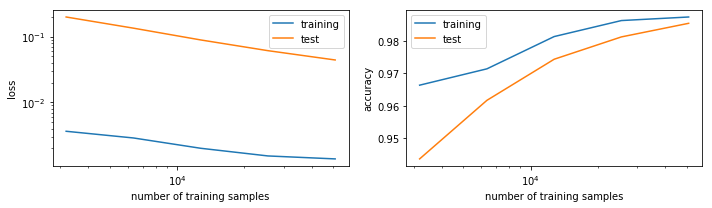

In [221]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.loglog(N,TRAIN_LOSS,label='training')
plt.loglog(N,TEST_LOSS,label='test')
plt.xlabel('number of training samples')
plt.ylabel('loss')
plt.legend()
plt.subplot(1,2,2)
plt.semilogx(N,TRAIN_ACCURACY,label='training')
plt.semilogx(N,TEST_ACCURACY,label='test')
plt.xlabel('number of training samples')
plt.ylabel('accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('./figures/sample_size2.png')

# 8 b

In [222]:
class Net(nn.Module):
    '''
    Build the best MNIST classifier.
    '''
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3,3), stride=1)
     
        self.dropout1 = nn.Dropout2d(.1)
     
        self.fc0 = nn.Linear(1352, 64)
        self.fc1 = nn.Linear(64, 10)
    

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.avg_pool2d(x, 2)
        x = self.dropout1(x)

        x = torch.flatten(x, 1)
        x = self.fc0(x)
        x = F.relu(x)
        x = self.fc1(x)
        
        output = F.log_softmax(x, dim=1)
        return output
def test(model, device, test_loader):
    model.eval()    # Set the model to inference mode
    test_loss = 0
    correct = 0
    with torch.no_grad():   # For the inference step, gradient is not computed
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.sampler)
    
    accuracy = correct / len(test_loader.sampler)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.sampler),
        100. * correct / len(test_loader.sampler)))
    return pred,target



In [223]:
model_dir = './best_mnist_model.pt'

# Set the test model
model = Net().to(device)
device = 'cpu'
model.load_state_dict(torch.load(model_dir))

test_dataset = datasets.MNIST('../data', train=False,
            transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
            ]))

test_loader = torch.utils.data.DataLoader(
            test_dataset, batch_size=10000, shuffle=False)

prediction,target = test(model, device, test_loader)
#         import csv
#         exp_name = 'best_Net_test_full'
#         with open('./figures/'+exp_name+'.csv', 'w', newline='') as csvfile:
#             spamwriter = csv.writer(csvfile, delimiter=' ',
#                                 quotechar='|', quoting=csv.QUOTE_MINIMAL)
#             spamwriter.writerow(['TEST_ACCURACY','TEST_LOSS'])
#             spamwriter.writerow([test_accuracy,test_loss])
   


Test set: Average loss: 0.0434, Accuracy: 9854/10000 (99%)



In [224]:
prediction = np.array(prediction).reshape(-1)
target = np.array(target)

In [225]:
ind = np.where((prediction-target)!=0)[0]

In [226]:
train_loader_all_aug = torch.utils.data.DataLoader(test_dataset)
examples = enumerate(train_loader_all_aug)
train_raw_idx = []
train_raw_data = []
train_raw_target = []
for i in examples:
        train_raw_idx.append(i[0])
        train_raw_data.append(i[1][0].numpy()[0])
        train_raw_target.append(i[1][1].numpy()[0])

In [227]:
train_raw_data[ind[0]].shape

(1, 28, 28)

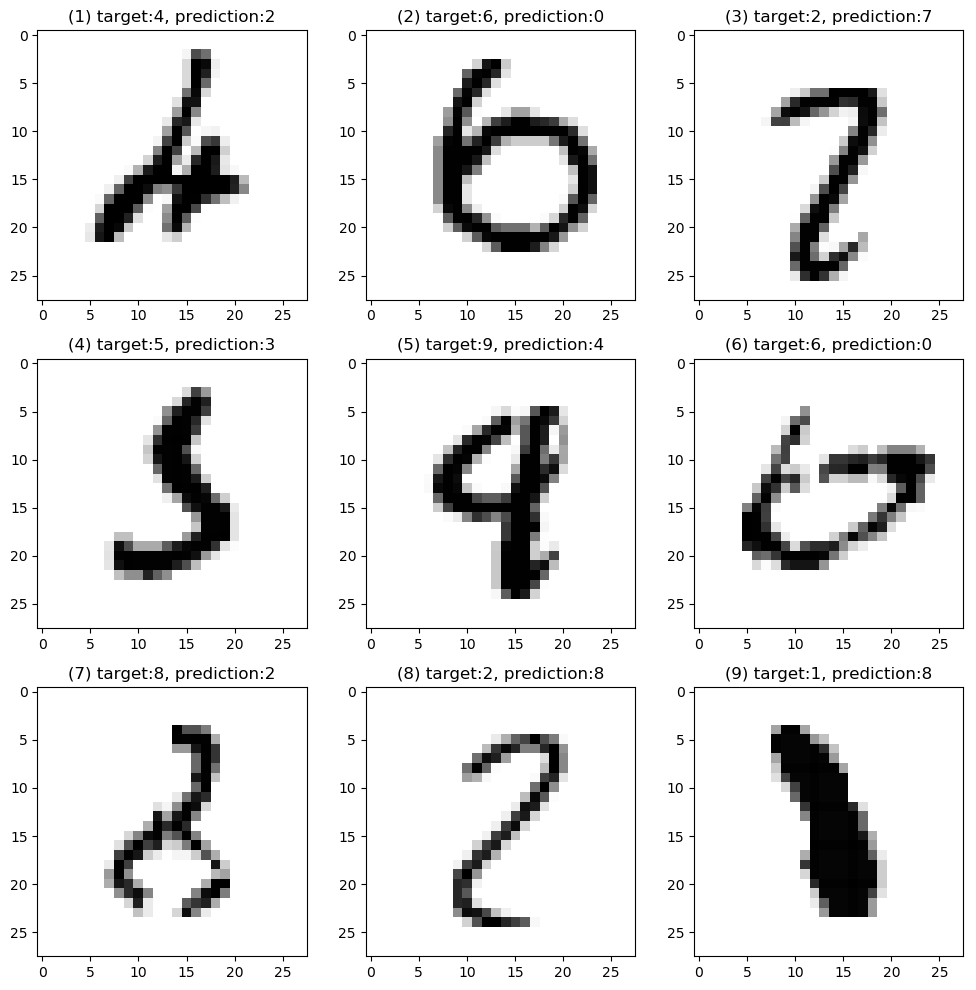

In [228]:
plt.figure(figsize=(10,10),dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
#     plt.figure()
    plt.imshow(train_raw_data[ind[i]].reshape(28,28),cmap='gray_r')
    plt.title('(%d) target:%d, prediction:%d'%(i+1,target[ind[i]],prediction[ind[i]]))
plt.tight_layout()
plt.savefig('./figures/wrong.png')

In [229]:
for i in range(9):
    print(i,target[ind[i]],prediction[ind[i]])
    print()

0 4 2

1 6 0

2 2 7

3 5 3

4 9 4

5 6 0

6 8 2

7 2 8

8 1 8



# 8c

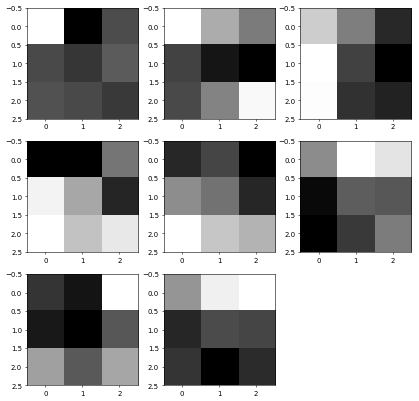

In [230]:
plt.figure(figsize=(10,10),dpi=50)
for i in range(8):
    plt.subplot(3,3,i+1)
    
    kernel = np.empty((3,3))
    for j in range(3):
        for k in range(3):
            kernel[j,k] = kernels[i][0][j][k].item()
            
    plt.imshow(kernel,cmap='gray_r')
plt.savefig('./figures/kernels.png')

# 8d

In [231]:
from sklearn.metrics import confusion_matrix

y_true = target.copy()
y_pred = prediction.copy()
cmatrix = confusion_matrix(y_true,y_pred,labels=np.arange(10))
cmatrix

array([[ 973,    0,    1,    0,    0,    0,    2,    1,    3,    0],
       [   0, 1124,    2,    2,    0,    0,    3,    0,    4,    0],
       [   3,    2, 1013,    2,    2,    0,    0,    6,    4,    0],
       [   0,    0,    2,  999,    0,    2,    0,    3,    3,    1],
       [   0,    0,    2,    0,  969,    0,    3,    0,    2,    6],
       [   2,    0,    0,    3,    0,  882,    2,    0,    3,    0],
       [   4,    2,    0,    1,    1,    3,  941,    0,    6,    0],
       [   1,    3,    5,    1,    1,    0,    0, 1013,    1,    3],
       [   3,    1,    1,    3,    1,    1,    2,    4,  953,    5],
       [   2,    3,    0,    4,    5,    1,    0,    5,    2,  987]])

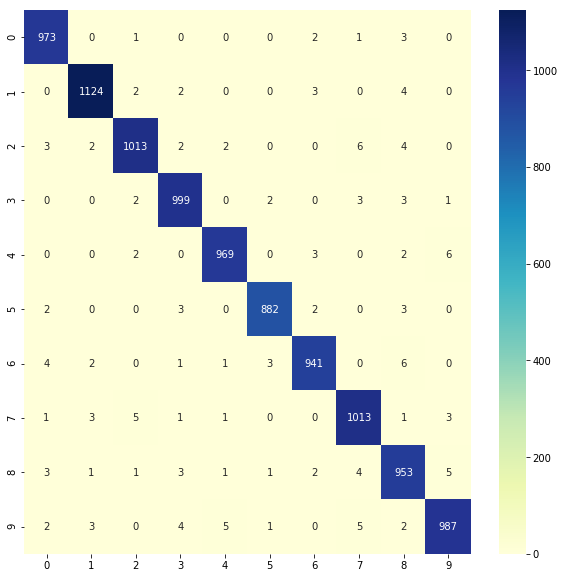

In [232]:
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.heatmap(cmatrix, cmap="YlGnBu",annot=True, fmt="d")
plt.savefig('./figures/confusion_matrix.png')

# 8ei

In [235]:
class Net(nn.Module):
    '''
    Build the best MNIST classifier.
    '''
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3,3), stride=1)
     
        self.dropout1 = nn.Dropout2d(.1)
     
        self.fc0 = nn.Linear(1352, 64)
        self.fc1 = nn.Linear(64, 10)
    

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.avg_pool2d(x, 2)
        x = self.dropout1(x)

        x = torch.flatten(x, 1)
        x = self.fc0(x)
        x = F.relu(x)
        result = self.fc1(x)
        
        output = F.log_softmax(result, dim=1)
        return output,result
def test(model, device, test_loader):
    model.eval()    # Set the model to inference mode
    test_loss = 0
    correct = 0
    with torch.no_grad():   # For the inference step, gradient is not computed
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output,result_to_last = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.sampler)
    
    accuracy = correct / len(test_loader.sampler)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.sampler),
        100. * correct / len(test_loader.sampler)))
    return pred,target,result_to_last




In [236]:
model_dir = './best_mnist_model.pt'

# Set the test model
model = Net().to(device)
device = 'cpu'
model.load_state_dict(torch.load(model_dir))

test_dataset = datasets.MNIST('../data', train=False,
            transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
            ]))

test_loader = torch.utils.data.DataLoader(
            test_dataset, batch_size=10000, shuffle=False)

prediction,target,result_to_last = test(model, device, test_loader)
#         import csv
#         exp_name = 'best_Net_test_full'
#         with open('./figures/'+exp_name+'.csv', 'w', newline='') as csvfile:
#             spamwriter = csv.writer(csvfile, delimiter=' ',
#                                 quotechar='|', quoting=csv.QUOTE_MINIMAL)
#             spamwriter.writerow(['TEST_ACCURACY','TEST_LOSS'])
#             spamwriter.writerow([test_accuracy,test_loss])
   


Test set: Average loss: 0.0434, Accuracy: 9854/10000 (99%)



In [240]:
result_to_last = np.array(result_to_last)

In [241]:

from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(result_to_last)
X_embedded.shape

(10000, 2)

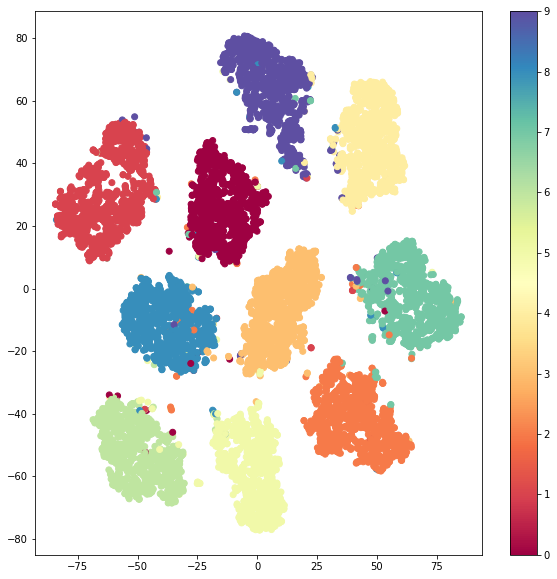

In [250]:
plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=target, cmap=plt.cm.Spectral)
plt.colorbar()
plt.savefig('./figures/tsne.png')

# 8eii

In [255]:
len(train_raw_data) # forgot to change the name. It is test dataset

10000

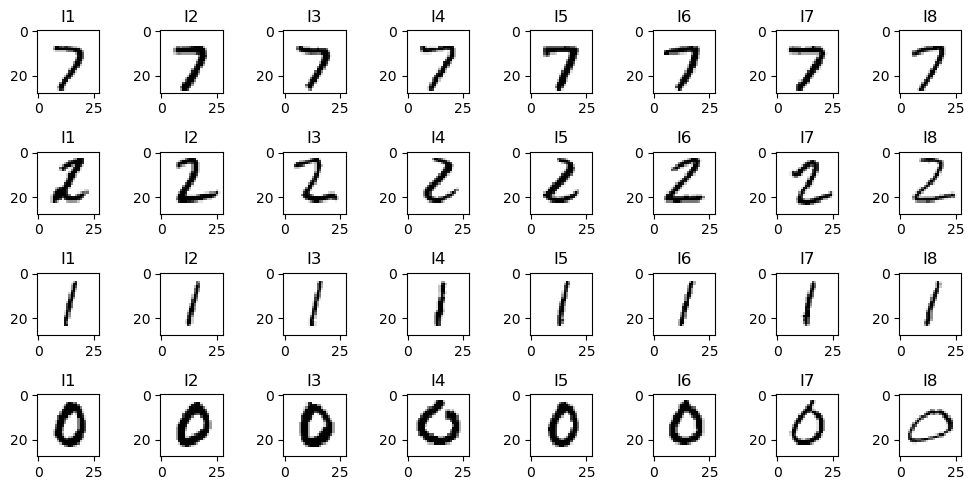

In [293]:
plt.figure(figsize=(10,5),dpi = 100)

I0 = train_raw_data[0][0,:,:]
x0 = result_to_last[0]
distance = []
for i in result_to_last:
    distance.append(np.linalg.norm(i-x0))
near_ind = np.argsort(distance)[1:9]
for i in range(8):
    plt.subplot(4,8,i+1)
    plt.imshow(train_raw_data[near_ind[i]][0,:,:],cmap='gray_r')
    plt.title('I%d'%(i+1))

I0 = train_raw_data[1][0,:,:]
x0 = result_to_last[1]
distance = []
for i in result_to_last:
    distance.append(np.linalg.norm(i-x0))
near_ind = np.argsort(distance)[1:9]
for i in range(8):
    plt.subplot(4,8,8+i+1)
    plt.imshow(train_raw_data[near_ind[i]][0,:,:],cmap='gray_r')
    plt.title('I%d'%(i+1))

    
I0 = train_raw_data[2][0,:,:]
x0 = result_to_last[2]
distance = []
for i in result_to_last:
    distance.append(np.linalg.norm(i-x0))
near_ind = np.argsort(distance)[1:9]
for i in range(8):
    plt.subplot(4,8,16+i+1)
    plt.imshow(train_raw_data[near_ind[i]][0,:,:],cmap='gray_r')
    plt.title('I%d'%(i+1))

    
I0 = train_raw_data[3][0,:,:]
x0 = result_to_last[3]
distance = []
for i in result_to_last:
    distance.append(np.linalg.norm(i-x0))
near_ind = np.argsort(distance)[1:9]
for i in range(8):
    plt.subplot(4,8,24+i+1)
    plt.imshow(train_raw_data[near_ind[i]][0,:,:],cmap='gray_r')
    plt.title('I%d'%(i+1))

    
    
    
    
plt.tight_layout()
plt.savefig('./figures/distance.png')